# Restaurant Recommend System

# 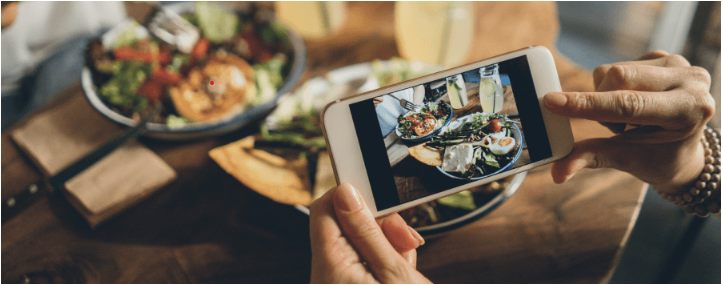

In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('Dataset.csv')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.shape

(9551, 21)

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
df["Locality"].isnull().sum()

0

In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df.dropna(inplace=True)
# Removing null values

In [10]:
df["Restaurant Name"].value_counts()

Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7437, dtype: int64

In [11]:
#Removing the Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [12]:
df[df['Restaurant Name']=="Cafe Coffee Day"]["Address"].nunique()

83

In [13]:
df[df['Votes']>200]["Votes"].unique

<bound method Series.unique of 0        314
1        591
2        270
3        365
4        229
        ... 
9546     788
9547    1034
9548     661
9549     901
9550     591
Name: Votes, Length: 1695, dtype: int64>

In [14]:
df["Cuisines"]=df["Cuisines"].apply(lambda x:x.split(","))

In [15]:
df["Cuisines"]

0              [French,  Japanese,  Desserts]
1                                  [Japanese]
2       [Seafood,  Asian,  Filipino,  Indian]
3                          [Japanese,  Sushi]
4                         [Japanese,  Korean]
                        ...                  
9546                                [Turkish]
9547      [World Cuisine,  Patisserie,  Cafe]
9548                [Italian,  World Cuisine]
9549                        [Restaurant Cafe]
9550                                   [Cafe]
Name: Cuisines, Length: 9542, dtype: object

In [16]:
df=df.drop(['Locality Verbose'],axis=1)


In [17]:
df["Address"]=df["Address"].apply(lambda x:x.split(","))

In [18]:
df["Locality"]=df["Locality"].apply(lambda x:x.split(","))

In [19]:
df.tail(50)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9501,5800590,The Commons,191,Colombo,"[39 A, Flower Road, Cinnamon Gardens, Colom...","[Cinnamon Gardens, Colombo 07]",79.858105,6.908536,"[Cafe, Sri Lankan, Continental, American]",2500,Sri Lankan Rupee(LKR),No,No,No,No,3,4.0,Green,Very Good,209
9502,5800755,Upali's,191,Colombo,"[65, C.W.W Kannangara Mawatha, Near Town Hal...","[Cinnamon Gardens, Colombo 07]",79.864727,6.912529,[Sri Lankan],2500,Sri Lankan Rupee(LKR),No,No,No,No,3,4.0,Green,Very Good,114
9503,5800515,Malay Restaurant,191,Colombo,"[115, Hill Street, Dehiwala, Colombo]","[Dehiwala, Colombo]",79.870890,6.850283,"[Malaysian, North Indian, Sri Lankan]",1500,Sri Lankan Rupee(LKR),No,No,No,No,2,3.5,Yellow,Good,80
9504,5800746,T.G.I. Friday's,191,Colombo,"[23, Canal Row, Fort, Colombo 01]","[Fort, Colombo 01]",79.843575,6.932547,"[American, Steak]",4000,Sri Lankan Rupee(LKR),No,No,No,No,4,4.0,Green,Very Good,166
9505,5800718,Simply Strawberries By Jagro,191,Colombo,"[131, Vijaya Kumaratunge Mawathu, Havelock T...","[Havelock Town, Colombo 05]",79.879433,6.883739,"[Juices, Desserts]",1300,Sri Lankan Rupee(LKR),No,No,No,No,2,4.5,Dark Green,Excellent,146
9506,5800758,Cafe Shaze,191,Colombo,"[65, Thimbirigasaya Road, Havelock Town, Co...","[Havelock Town, Colombo 05]",79.865639,6.890906,"[Cafe, Fast Food, Beverages]",3500,Sri Lankan Rupee(LKR),No,No,No,No,3,3.8,Yellow,Good,81
9507,5800156,Queen's Cafe,191,Colombo,"[417, Duplication Road, Kollupitiya, Colomb...","[Kollupitiya, Colombo 03]",79.855819,6.899175,"[American, Chinese, North Indian]",2000,Sri Lankan Rupee(LKR),No,No,No,No,3,2.5,Orange,Average,93
9508,5801078,Arabian Knights,191,Colombo,"[377, Opposite Amana Bank, Galle Road, Koll...","[Kollupitiya, Colombo 03]",79.852248,6.904392,"[Middle Eastern, Arabian]",2400,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,158
9509,5801970,Butter Boutique,191,Colombo,"[34, 27th Lane, Kollupitiya, Colombo 03]","[Kollupitiya, Colombo 03]",79.856148,6.906860,"[Desserts, Bakery]",1000,Sri Lankan Rupee(LKR),No,No,No,No,2,4.2,Green,Very Good,49
9510,5800144,Carnival Ice Cream,191,Colombo,"[263, Galle Road, Near NSB ATM, Kollupitiya...","[Kollupitiya, Colombo 03]",79.850073,6.910538,"[Desserts, Ice Cream]",1000,Sri Lankan Rupee(LKR),No,No,No,No,2,4.1,Green,Very Good,122


In [20]:
def collapse(L):
    L1=[]
    for i in L:
        L1.append(i.replace(" ",""))
    return L1    

In [21]:
df["Cuisines"]=df["Cuisines"].apply(collapse)
df["Address"]=df["Address"].apply(collapse)
df["Locality"]=df["Locality"].apply(collapse)

In [22]:
df["City"]=df["City"].apply(lambda x:(x.replace(" ","")).split(" "))

In [23]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,[MakatiCity],"[ThirdFloor, CenturyCityMall, KalayaanAvenue, ...","[CenturyCityMall, Poblacion, MakatiCity]",121.027535,14.565443,"[French, Japanese, Desserts]",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,[MakatiCity],"[LittleTokyo, 2277ChinoRocesAvenue, LegaspiVil...","[LittleTokyo, LegaspiVillage, MakatiCity]",121.014101,14.553708,[Japanese],1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,[MandaluyongCity],"[EdsaShangri-La, 1GardenWay, Ortigas, Mandaluy...","[EdsaShangri-La, Ortigas, MandaluyongCity]",121.056831,14.581404,"[Seafood, Asian, Filipino, Indian]",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,[MandaluyongCity],"[ThirdFloor, MegaFashionHall, SMMegamall, Orti...","[SMMegamall, Ortigas, MandaluyongCity]",121.056475,14.585318,"[Japanese, Sushi]",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,[MandaluyongCity],"[ThirdFloor, MegaAtrium, SMMegamall, Ortigas, ...","[SMMegamall, Ortigas, MandaluyongCity]",121.057508,14.584450,"[Japanese, Korean]",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [24]:
df['tags']=df["Cuisines"]+df["Address"]+df["Locality"]

In [25]:
df['tags']

0       [French, Japanese, Desserts, ThirdFloor, Centu...
1       [Japanese, LittleTokyo, 2277ChinoRocesAvenue, ...
2       [Seafood, Asian, Filipino, Indian, EdsaShangri...
3       [Japanese, Sushi, ThirdFloor, MegaFashionHall,...
4       [Japanese, Korean, ThirdFloor, MegaAtrium, SMM...
                              ...                        
9546    [Turkish, Kemanke��KaramustafaPa��aMahallesi, ...
9547    [WorldCuisine, Patisserie, Cafe, Ko��uyoluMaha...
9548    [Italian, WorldCuisine, Kuru�_e��meMahallesi, ...
9549    [RestaurantCafe, Kuru�_e��meMahallesi, Muallim...
9550    [Cafe, Cafea��aMahallesi, Bademalt۱Sokak, No21...
Name: tags, Length: 9542, dtype: object

In [26]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'tags'],
      dtype='object')

In [27]:
new=df[["Restaurant ID","Restaurant Name","Country Code","tags",'Has Table booking','Has Online delivery','Is delivering now','Price range','Aggregate rating','Rating text']]

In [28]:
new['tags']=df['tags'].apply(lambda x:" ".join(x))

C:\Users\99Minds-1\AppData\Local\Temp\ipykernel_14228\2458189655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['tags']=df['tags'].apply(lambda x:" ".join(x))


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [31]:
vector = cv.fit_transform(new['tags']).toarray()

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
similarity = cosine_similarity(vector)

In [34]:
new[new['Restaurant Name'] == 'Le Petit Souffle'].index[0]

0

In [35]:
def myrecommend(resto):
    restos=[]
    index = new[new['Restaurant Name'] == resto].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        restos.append((new.iloc[i[0]]['Restaurant Name']))
    return restos

In [36]:
myrecommend('Le Petit Souffle')

['Izakaya Kikufuji',
 'Miann',
 'Jaan',
 'Rhubarb Le Restaurant',
 'Tokyo Mon Amour']

In [37]:
myrecommend('Cafe Coffee Day')

['Al Bake', 'Nite Bites', 'Chickenette', 'Chicago Pizza', 'Frontier']

In [38]:
myfav={
    "a":['Restaurant Name','Aggregate rating',"Has Table booking","Price range","Rating text"]
    
}
output=df[df['Restaurant Name'].isin(myrecommend('Le Petit Souffle'))]
(output[['Restaurant Name','Aggregate rating',"Cuisines","City","Has Table booking","Price range","Rating text",'Has Online delivery']])

,Restaurant Name,Aggregate rating,Cuisines,City,Has Table booking,Price range,Rating text,Has Online delivery
1,Izakaya Kikufuji,4.5,[Japanese],[MakatiCity],Yes,3,Excellent,No
460,Jaan,3.8,[French],[Singapore],No,4,Good,No
461,Rhubarb Le Restaurant,3.9,[French],[Singapore],No,4,Good,No
4993,Tokyo Mon Amour,3.1,"[Japanese, French]",[NewDelhi],Yes,4,Average,No
9303,Miann,4.9,[Desserts],[Auckland],No,1,Excellent,No


In [39]:
myfav={
    "a":['Restaurant Name','Aggregate rating',"Has Table booking","Price range","Rating text"]
    
}
output=df[df['Restaurant Name'].isin(myrecommend('The Commons'))]
(output[['Restaurant Name','Aggregate rating',"Cuisines","City","Has Table booking","Price range","Rating text",'Has Online delivery']])

,Restaurant Name,Aggregate rating,Cuisines,City,Has Table booking,Price range,Rating text,Has Online delivery
9507,Queen's Cafe,2.5,"[American, Chinese, NorthIndian]",[Colombo],No,3,Average,No
9508,Arabian Knights,4.2,"[MiddleEastern, Arabian]",[Colombo],No,3,Very Good,No
9509,Butter Boutique,4.2,"[Desserts, Bakery]",[Colombo],No,2,Very Good,No
9511,Cricket Club Cafe,4.2,"[Continental, American, Seafood]",[Colombo],No,3,Very Good,No
9512,The Manhattan Fish Market,4.0,"[Seafood, Italian]",[Colombo],No,4,Very Good,No
